# Reinforcement Learning - Q learning Test Case
This notebook is an extension of the pytest file used in TDD. It shows the results of the following function(s) in the library

- train_model_RL_Q_ShortestPath

Note: the algorithm finds the shortest path for small networks. if the connectivity increases, it starts overstimating 
the shortes path. Need to explore literature and other approaches.

- https://gist.github.com/kastnerkyle/d127197dcfdd8fb888c2
- https://nestedsoftware.com/2019/07/25/tic-tac-toe-with-tabular-q-learning-1kdn.139811.html
- https://valohai.com/blog/reinforcement-learning-tutorial-part-1-q-learning/
- https://amunategui.github.io/reinforcement-learning/index.html
- https://link.springer.com/content/pdf/10.1007/BF00992698.pdf

In [1]:
import networkx as nx
import pylab as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [2]:
def get_network(nodes,k_neighbors,destination_node,prob):
    """
    Initializes a random network using the small-world model
    
    Parameters:
    nodes: scalat
        number of nodes in the network
    k_neighbors:  scalar
        number of connections in each node
    destination_node: scalar
        index of node to be consider the destination of the paths
    prob: scalar
        probability of connection in the network
        
    Returns:
    G: networkx object
        Network
        
    Note - draws the network
    """
    
    G = nx.watts_strogatz_graph(nodes,k_neighbors,prob)
    
    node_color_list = np.array(['lightblue']*nodes)
    node_color_list[destination_node] = 'green'
    print(node_color_list)
    
    plt.figure(figsize=(8,8))
    nx.draw(G, node_color=node_color_list, with_labels=True, node_size=500)
    return(G)

In [92]:
def get_reward_matrix(G,destination_node,destination_reward):
    """
    Computes reward matrix. If there is no connection between two nodes, the reward is -1 (impossible). If tere is a 
    connection between the nodes, reward is 0. If the node is connected to the destination, the reward is assigned
    TODO: vary the value of the reward. 
    
    Parameters:
    G: networkx obect
        network
    destination_node: scalar
        index of node to be consider the destination of the paths
    reward: scalar
        reward of destination node and its neighbors
        
    Returns:
    R: numpy array
        reward matrix
    """
    
    AdjM = nx.to_numpy_array(G)
    destination_neighbors = [n for n in G.neighbors(destination_node)]
    R = AdjM - 1
    R[destination_node,destination_node] = destination_reward
    for node in destination_neighbors:
        R[node,destination_node] = destination_reward
    return(R)

In [4]:
def initialize_Q(R,method='zero'):
    """
    Initializes the Q-matrix. Two approaches a) all zeros and b) random numbers [0,1]
    
    Parameters:
    R: numpy array
        reward matrix
    method:  string
        method to populate Q:
        'zero' - all zeros
        'random' - random [0,1]
      
    Returns:
    Q: numpy array
        initial value of Q
    """
    
    if method == 'zero':
        return(np.zeros_like(R))
    if method == 'random':
        return(np.random.rand(R.shape[0],r.shape[1]))

In [5]:
def update_Q(state,next_state,action,Q,R,alpha,gamma):
    """
    Update the Q-matrix using Bellman's equation. 
    REferences:
    - https://link.springer.com/content/pdf/10.1007/BF00992698.pdf Eq 1
    - https://valohai.com/blog/reinforcement-learning-tutorial-part-1-q-learning/ 
    
    Parameters:
    state, next_state, action: scalars
        the index of current state, next state and the action, respectively
    Q: numpy array
        Q matrix
    R: numpy array
        reward matrix
    alpha, gamma: scalars
        learning parameters
      
    Returns:
    Q: numpy array
        updated value of Q
    reward: scalar
        reward for (state,action)
    score: scalar
        normalized sum of Q
    """
    
    Q[state,action] = Q[state,action] + alpha*(R[state,action] + gamma*max(Q[next_state]) - Q[state,action])
    normalization_factor = Q[state][Q[state] > 0] / np.sum(Q[state][Q[state] > 0])
    Q[state][Q[state] > 0] = normalization_factor
    
    if (np.max(Q) > 0):
        score = 100*np.sum(Q/np.max(Q))
    else:
        score = 0
    reward = R[state, action]
    return(Q, reward, score)

In [6]:
def get_available_states(state,R):
    """
    finds avaliable states for a given state. By definition, this corresponds to values in R[state] with non-negative 
    values
    
    Parameters:
    state: scalar
        index of current state
    R: numpy array
        reward matrix
      
    Returns:
    available_states: numpy array
        list of accesible states from current state
    """
    available_states = np.arange(len(R))[R[state]>=0]
    return(available_states)

In [7]:
def get_random_available_state(state,R):
    """
    selects a random states from avaliable states for a given state. 
    
    Parameters:
    state: scalar
        index of current state
    R: numpy array
        reward matrix
      
    Returns:
    random_state: scalar
        random index from accesible states from current state
    """
    available_states = get_available_states(state,R)
    np.random.shuffle(available_states)
    random_state = available_states[0]
    return(random_state)

In [93]:
def get_best_available_state(state,R,Q):
    """
    selects state with highest Q value from avaliable states for a given state. 
    
    Parameters:
    state: scalar
        index of current state
    Q: numpy array
        Q matrix
    R: numpy array
        reward matrix
    
    Returns:
    best_state: scalar
        index from highest Q state from accesible states from current state
        
    TODO: revisit definitions, notation and language
    """
    
    if np.sum(Q[state]) > 0:
        best_state = np.argmax(Q[state])
    else:
        best_state = get_random_available_state(state,R)
    return(action)

In [9]:
def show_paths(Q,destination_node):
    """
    prints shortest paths from all nodes to destination nodes 
    
    Parameters:
    Q: numpy array
        Q matrix
    destination_node: scalar
        index of destination node
    
    Returns:
    lLenght: list
        list of length of shortest paths
    
    Note: prints the paths
        
    TODO: revisit performance for arbitrary networks
    """
    lLength = []
    # show all the greedy traversals
    for ii in range(len(Q)):
        state = ii
        path_list = [ii]
        path_string = str(state) + " -> "
        while state != destination_node and len(np.unique(path_list))==len(path_list):
            next_state = np.argmax(Q[state])
            state = next_state
            path_string = path_string + str(state) + " -> " 
            path_list.append(state)

        print(path_string[:-4])
        print("")
        lLength.append(path_list)
    return(lLength)

['lightblue' 'lightblue' 'lightblue' 'lightblue' 'lightblue' 'green'
 'lightblue' 'lightblue']


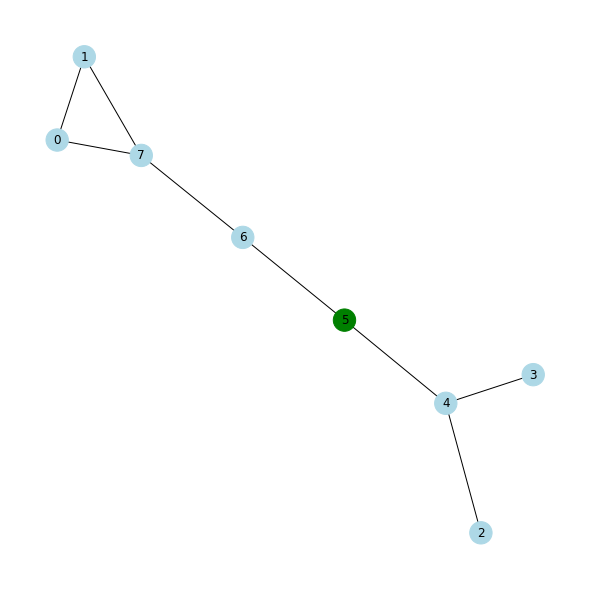

In [10]:
nodes = 8
destination_node = 5
destination_reward = 100
G = get_network(nodes,3,destination_node,0.1)
R = get_reward_matrix(G,destination_node,destination_reward)
Q = initialize_Q(R,'zero') 
states = np.arange(nodes)

In [11]:
alpha = 1
gamma = 0.8
lScore = [0]
eps = 0.05
early_stop = False
early_stop_eps = 0.0001
for _ in range(200):
#while early_stop == False:
    np.random.shuffle(states)
    current_state = states[0]

    reached_goal = False
    while reached_goal == False:
        if np.random.rand() < eps:
            next_state = get_random_available_state(current_state,R)
            action = next_state
        else:
            next_state = get_best_available_state(current_state,R,Q)
            action = next_state
        Q0 = np.copy(Q)
        Q,reward, score = update_Q(current_state,next_state,action,Q,R,alpha,gamma)
                
        if reward > 1:
            reached_goal = True
        current_state = next_state
    
    lScore.append(score)
        
    if len(lScore) > 50 and max(lScore[-50:]) - min(lScore[-50:]) < early_stop_eps:
        break
    

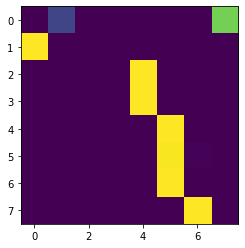

In [12]:
# visualization of Q matrix
plt.imshow(Q)

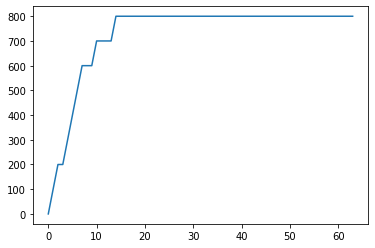

In [13]:
# evolution of the score. 
plt.plot(lScore)

In [14]:
# list of paths
show_paths(Q,destination_node=5)

0 -> 7 -> 6 -> 5

1 -> 0 -> 7 -> 6 -> 5

2 -> 4 -> 5

3 -> 4 -> 5

4 -> 5

5

6 -> 5

7 -> 6 -> 5



[[0, 7, 6, 5],
 [1, 0, 7, 6, 5],
 [2, 4, 5],
 [3, 4, 5],
 [4, 5],
 [5],
 [6, 5],
 [7, 6, 5]]

In [15]:
def train_model_RL_Q(Q,R,alpha=1,gamma=1,eps=0.05,early_stop_eps=0.00001,N_iterations=2000):
    """
    Trains the RL Q-learning model with a greedy step, and eary stopping.
    
    Parameters:
    Q: numpy array
        Q matrix
    R: numpy array
        reward matrix
    alpha, gamma: scalars
        learning parameters
    eps: scalar 
        threshold used for greedy search
    early_stop_eps: scalar
        threshold used to stop early: if there is no major change in the score, stop itertion
    N_iterations: scalar
        number of iterations
    
    Returns:
    Q: numpy array
        final value of Q
    lScore: list
        list of scores for each iteration
        
    TODO: revisit definitions, notation and language
    """
    
    states = np.arange(len(Q))
    
    lScore = [0]
    early_stop = False
    
    for kk in range(N_iterations):
        #print(kk)
        np.random.shuffle(states)
        current_state = states[0]

        reached_goal = False
        while reached_goal == False:
            if np.random.rand() < eps:
                next_state = get_random_available_state(current_state,R)
                action = next_state
            else:
                next_state = get_best_available_state(current_state,R,Q)
                action = next_state
            Q,reward, score = update_Q(current_state,next_state,action,Q,R,alpha,gamma)

            if reward > 1:
                reached_goal = True
            current_state = next_state

        lScore.append(score)

        if len(lScore) > 50 and max(lScore[-50:]) - min(lScore[-50:]) < early_stop_eps:
            return(Q,lScore)

            
    return(Q,lScore)


['lightblue' 'lightblue' 'lightblue' 'lightblue' 'lightblue' 'green'
 'lightblue' 'lightblue' 'lightblue' 'lightblue']


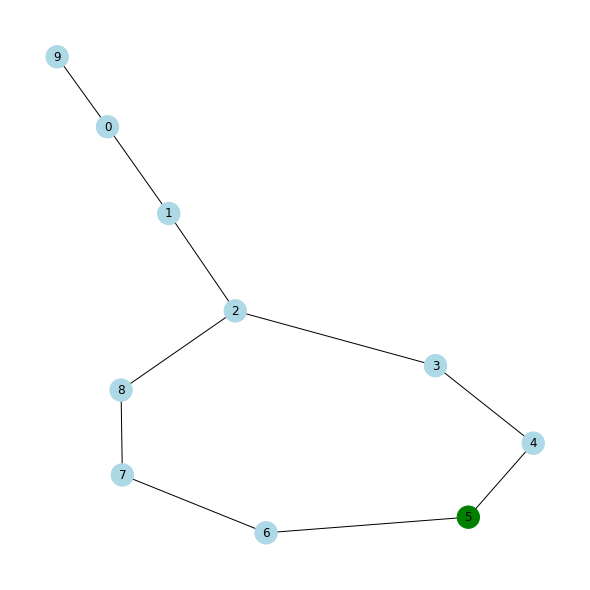

In [16]:
nodes = 10
destination_node = 5
destination_reward = 100
G = get_network(nodes,3,destination_node,0.1)
R = get_reward_matrix(G,destination_node,destination_reward)
Q = initialize_Q(R,'zero') 

In [17]:
Q,lScore = train_model_RL_Q(Q,R)

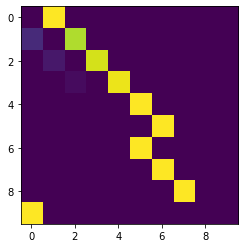

In [18]:
plt.imshow(Q)

In [19]:
lLength = show_paths(Q,destination_node=5)

0 -> 1 -> 2 -> 3 -> 4 -> 5

1 -> 2 -> 3 -> 4 -> 5

2 -> 3 -> 4 -> 5

3 -> 4 -> 5

4 -> 5

5

6 -> 5

7 -> 6 -> 5

8 -> 7 -> 6 -> 5

9 -> 0 -> 1 -> 2 -> 3 -> 4 -> 5



In [20]:
# testing error in shortest path length vs networkx algorithm
Error = 0
for ii in range(len(Q)):
    if len(nx.shortest_path(G, source=ii, target=5)) != len(lLength[ii]):
        Error = Error + 1
        print('*',nx.shortest_path(G, source=ii, target=5),lLength[ii])
    else:
        print(nx.shortest_path(G, source=ii, target=5),lLength[ii])
print(Error/len(Q))

[0, 1, 2, 3, 4, 5] [0, 1, 2, 3, 4, 5]
[1, 2, 3, 4, 5] [1, 2, 3, 4, 5]
[2, 3, 4, 5] [2, 3, 4, 5]
[3, 4, 5] [3, 4, 5]
[4, 5] [4, 5]
[5] [5]
[6, 5] [6, 5]
[7, 6, 5] [7, 6, 5]
[8, 7, 6, 5] [8, 7, 6, 5]
[9, 0, 1, 2, 3, 4, 5] [9, 0, 1, 2, 3, 4, 5]
0.0


In [85]:
def train_model_RL_Q_animation(Q,R,alpha=1,gamma=1,eps=0.05,early_stop_eps=0.00001,N_iterations=50,animation_type='q'):
    """
    Trains the RL Q-learning model with a greedy step, and eary stopping.
    
    Parameters:
    Q: numpy array
        Q matrix
    R: numpy array
        reward matrix
    alpha, gamma: scalars
        learning parameters
    eps: scalar 
        threshold used for greedy search
    early_stop_eps: scalar
        threshold used to stop early: if there is no major change in the score, stop itertion
    N_iterations: scalar
        number of iterations
    animation_type: string
        type of animation
        animation_type = 'q'   ... just the Q matrix
        animation_type = 'qs'  ... just the Q matrix and the score
        animation_type = 'qsn' ... just the Q matrix, the score and the network
        
    Returns:
    Q: numpy array
        final value of Q
    lScore: list
        list of scores for each iteration
    lQ: list of numpy arrays
        list of Q for each iteration
    
    Note: generates and saves an animation (gif format) based on type of animation
        
    TODO: revisit definitions, notation and language
    """

    
    lQ = []
    states = np.arange(len(Q))
    
    lScore = [0]
    early_stop = False
    
    for kk in range(N_iterations):
        #print(Q)
        np.random.shuffle(states)
        current_state = states[0]

        reached_goal = False
        while reached_goal == False:
            if np.random.rand() < eps:
                next_state = get_random_available_state(current_state,R)
                action = next_state
            else:
                next_state = get_best_available_state(current_state,R,Q)
                action = next_state
            Q,reward, score = update_Q(current_state,next_state,action,Q,R,alpha,gamma)

            if reward > 1:
                reached_goal = True
            current_state = next_state

        lScore.append(score)
        #print(np.sum(Q))
        lQ.append(np.copy(Q))

        #if len(lScore) > 50 and max(lScore[-50:]) - min(lScore[-50:]) < early_stop_eps:
        #    return(Q,lScore)

    if animation_type == 'q': 
        fig, ax = plt.subplots()
        nnx = len(Q)
        nny = len(Q)

        line2d, = ax.plot([], [], lw=2)

        def init():
            line2d.set_data([], [])
            ax.imshow(np.zeros((nnx, nny)))
            return (line2d,)

        def animate(i):
            data = lQ[i]
            ax.set_title('i: ' + str(i))    
            ax.imshow(data)
            return (line2d,)

        anim = FuncAnimation(fig, animate, init_func=init, frames=len(lQ), interval=100, blit=False)
        anim.save("Q_evolution.gif", dpi=120, writer="imagemagick")
    
    if animation_type == 'qsn':

        fig, axs = plt.subplots(1,3,figsize=(30,10))
        nnx = len(Q)
        nny = len(Q)

        line2dA, = axs[0].plot([], [], lw=2)
        line2dB, = axs[1].plot([], [], lw=2)
        line2dC, = axs[2].plot([], [], lw=2)


        line = [line2dA, line2dB, line2dC]


        def animate3(i):
            data = lQ[i]
            axs[0].imshow(data)
            axs[1].plot(lScore[:i])
            axs[1].set_xlim([0,len(lScore)])
            axs[1].set_ylim([0,1.1*max(lScore)])
            my_pos = nx.spring_layout(G, seed = 100)
            #nx.draw(G, pos = my_pos, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)
            nx.draw(G, pos = my_pos, node_color=np.sum(data,axis=0), with_labels=True, node_size=500, ax=axs[2])
            return(line)

        anim3 = FuncAnimation(fig, animate3, frames=len(lQ), interval=100, blit=False)
        anim3.save("Q_evolution_network.gif", dpi=120, writer="imagemagick")
    
    if animation_type == 'qs':
        fig, axs = plt.subplots(1,2)
        nnx = len(Q)
        nny = len(Q)

        line2dA, = axs[0].plot([], [], lw=2)
        line2dB, = axs[1].plot([], [], lw=2)

        line = [line2dA, line2dB]


        def animate2(i):
            data = lQ[i]
            axs[0].imshow(data)
            axs[1].plot(lScore[:i])
            axs[1].set_xlim([0,len(lScore)])
            axs[1].set_ylim([0,1.1*max(lScore)])
            return(line)

        anim2 = FuncAnimation(fig, animate2, frames=len(lQ), interval=100, blit=False)
        anim2.save("Q_evolution_score.gif", dpi=120, writer="imagemagick")
    
    
    return(Q,lScore,lQ)


['lightblue' 'lightblue' 'lightblue' 'lightblue' 'lightblue' 'green'
 'lightblue' 'lightblue' 'lightblue' 'lightblue']


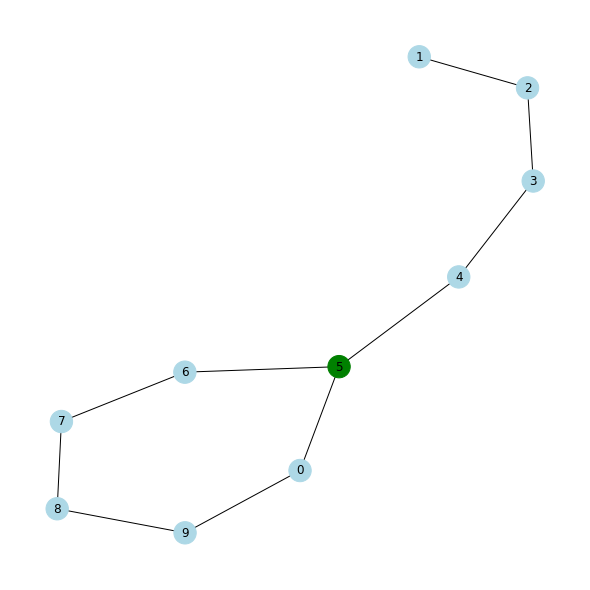

In [90]:
nodes = 10
destination_node = 5
destination_reward = 100
G = get_network(nodes,3,destination_node,0.1)
R = get_reward_matrix(G,destination_node,destination_reward)
Q = initialize_Q(R,'zero')

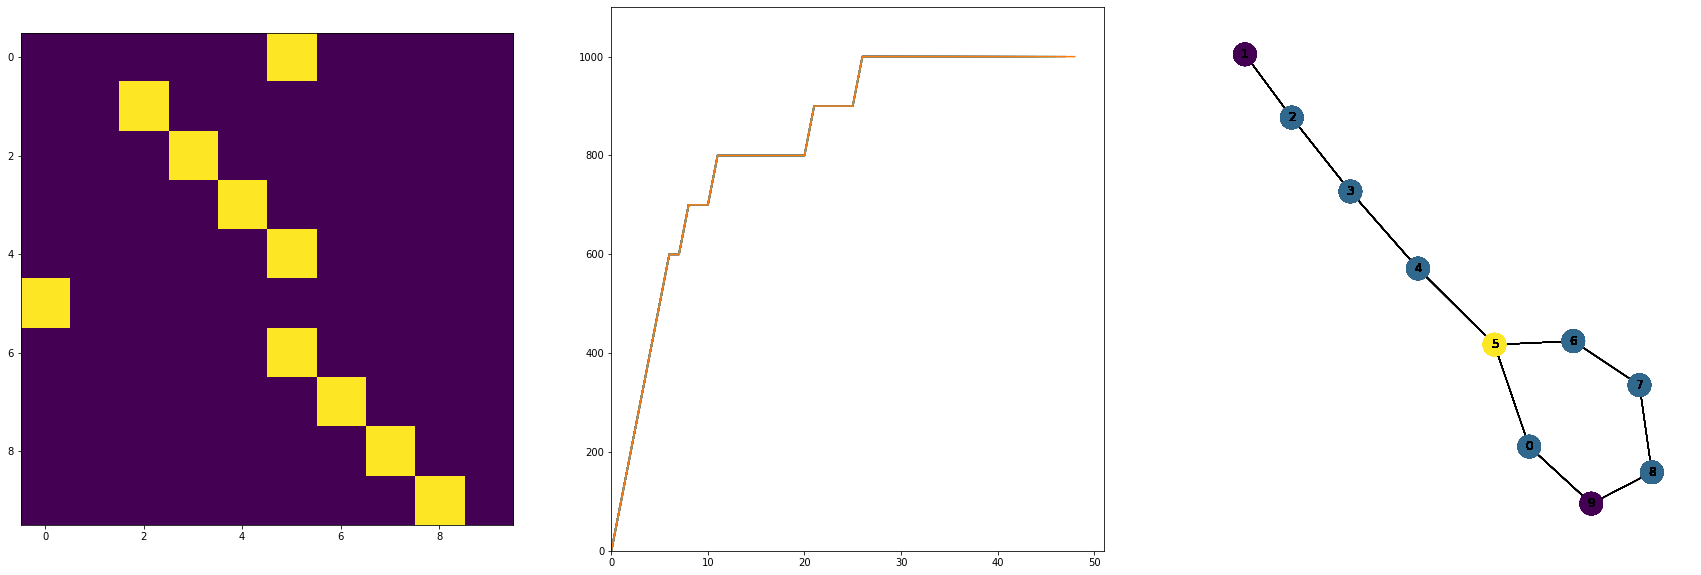

In [91]:
Q,lScore,lQ = train_model_RL_Q_animation(Q,R,animation_type='qsn')

In [84]:
np.sum(Q,axis=0)

array([0.        , 1.        , 1.        , 0.        , 1.        ,
       2.99995214, 0.93623831, 1.00004786, 1.06376169, 1.        ])

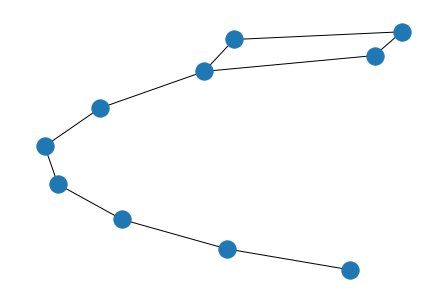

In [40]:
nx.draw(G)

In [ ]:
Q.